In [3]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# 2. Load Data
df = pd.read_csv('titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df.shape


(891, 12)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Column Types
# Numerical - Age,Fare,PassengerId
# Categorical - Survived, Pclass, Sex, SibSp, Parch,Embarked
# Mixed - Name, Ticket, Cabin

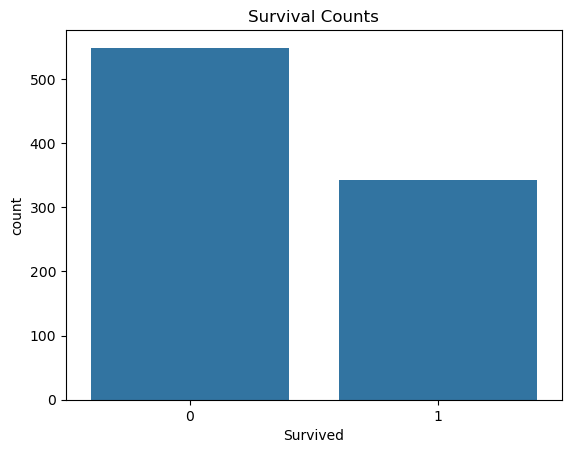

In [6]:
# 4. Target Variable Count 
sns.countplot(x='Survived', data=df)
plt.title('Survival Counts')
plt.show()

In [60]:
# 5. Descriptive Statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
# 6. Missing Values and Duplicates
print(df.isnull().sum())
print('====================================')
print("Duplicated rows:", df.duplicated().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Duplicated rows: 0


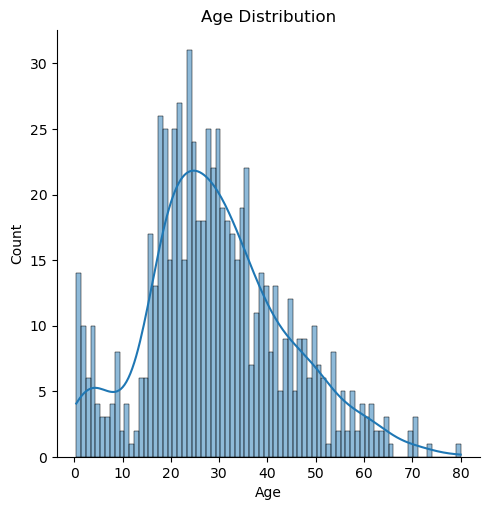

Skewness of Age: 0.38910778230082704


In [68]:


sns.displot(data=df, x='Age', kde=True, bins=80)
plt.title("Age Distribution")
plt.show()

print("Skewness of Age:", df['Age'].skew())





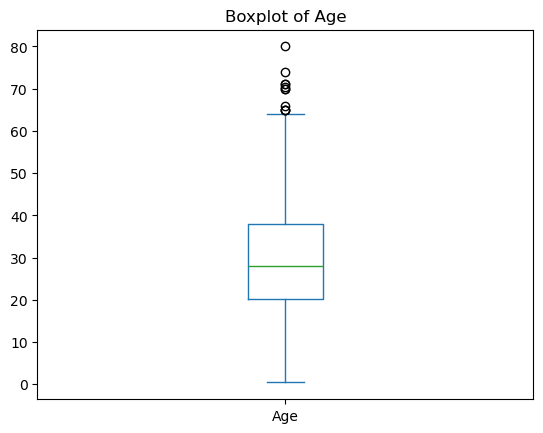

In [69]:
df['Age'].plot(kind='box')
plt.title("Boxplot of Age")
plt.show()

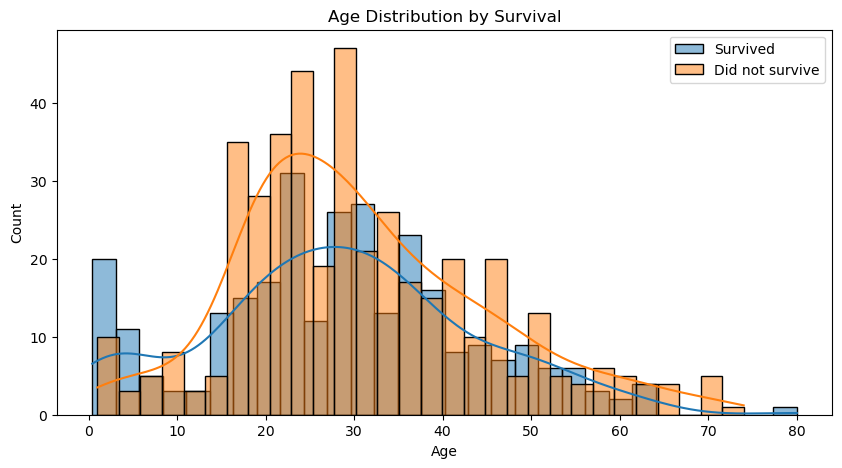

In [62]:
# 8. Age distribution with histogram
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, kde=True, label='Did not survive')
plt.legend()
plt.title('Age Distribution by Survival')
plt.show()

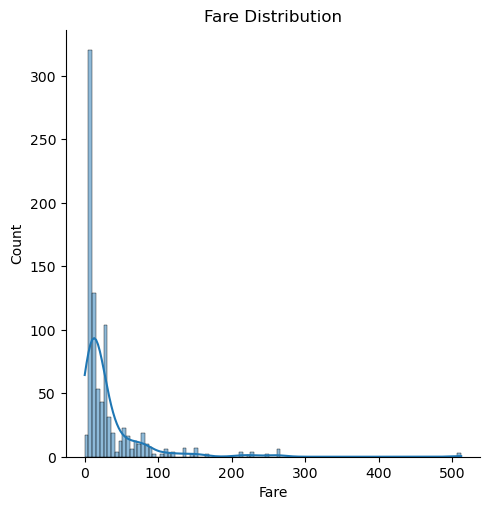

Skewness of Fare: 4.787316519674893


In [70]:
# 9. Fare Distribution Analysis
sns.displot(data=df, x='Fare', kde=True, bins=100)
plt.title("Fare Distribution")
plt.show()
print("Skewness of Fare:", df['Fare'].skew())

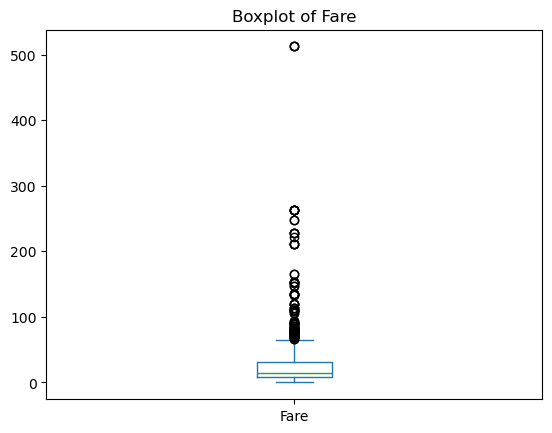

In [71]:
df['Fare'].plot(kind='box')
plt.title("Boxplot of Fare")
plt.show()

[3 1 2]
Pclass            1          2          3
Survived                                 
0         37.037037  52.717391  75.763747
1         62.962963  47.282609  24.236253


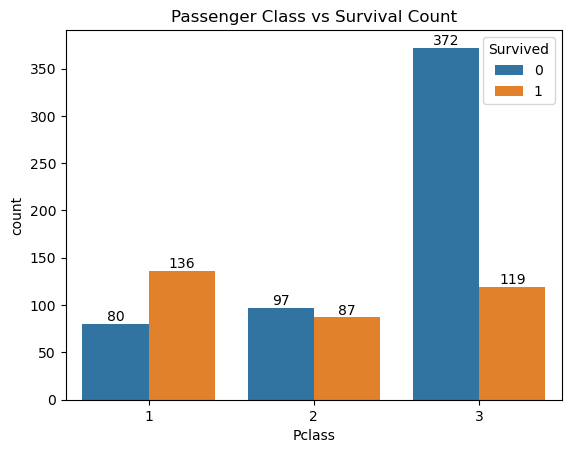

In [12]:
# 10. Pclass Analysis
print(df['Pclass'].unique())
print(pd.crosstab(df['Survived'], df['Pclass'], normalize='columns') * 100)

ax = sns.countplot(data=df, x='Pclass', hue='Survived')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Passenger Class vs Survival Count")
plt.show()

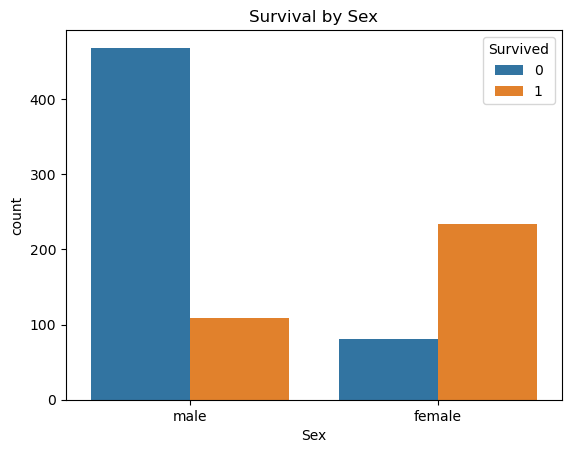

In [72]:
# 11. Sex Analysis
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

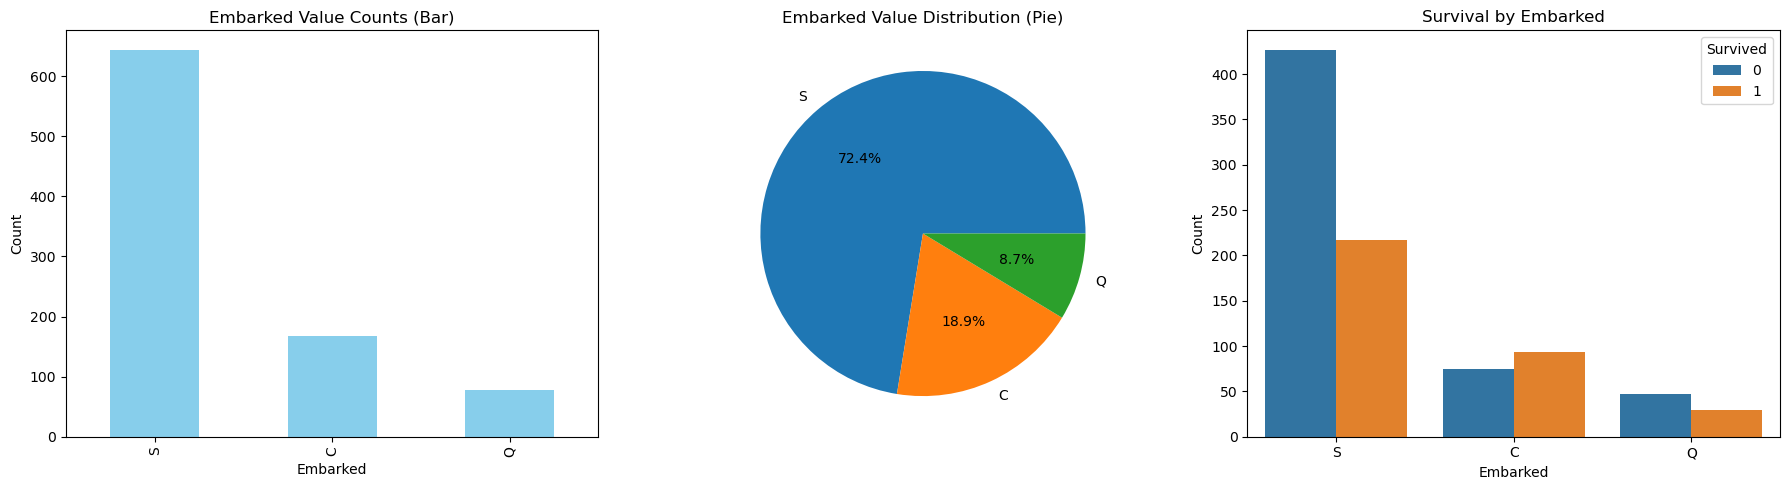

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplot figure
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Bar plot
df['Embarked'].value_counts().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title("Embarked Value Counts (Bar)")
axs[0].set_xlabel("Embarked")
axs[0].set_ylabel("Count")

# Pie chart
df['Embarked'].value_counts().plot(kind='pie', autopct='%0.1f%%', ax=axs[1])
axs[1].set_title("Embarked Value Distribution (Pie)")
axs[1].set_ylabel('')  # Remove y-label for pie chart

# Countplot: Survival by Embarked
sns.countplot(x='Embarked', hue='Survived', data=df, ax=axs[2])
axs[2].set_title("Survival by Embarked")
axs[2].set_xlabel("Embarked")
axs[2].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()


# Pre-Processing

In [19]:
# 1. Handle missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop('Cabin', axis=1, inplace=True) # ALOT OF MISSING VALUES

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_10776\1138670849.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [20]:
# 2. Remove Name and Title columns entirely (no title extraction)
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [21]:
# 3. Feature Engineering: FamilySize and IsAlone
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


#df['IsAlone'] = 1
#df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0

In [22]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

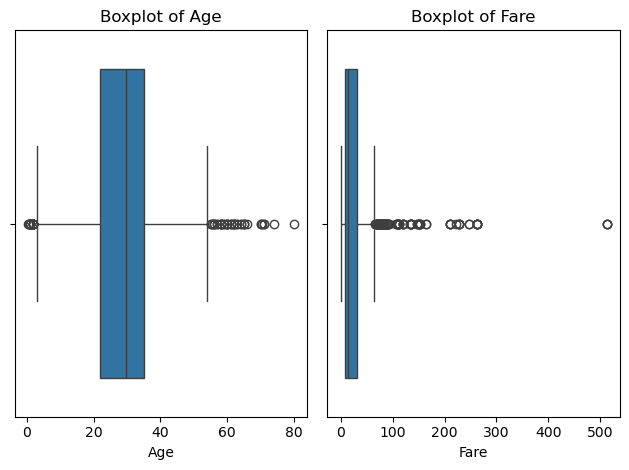

In [23]:
# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')

# Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_10776\121614705.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\PMYLS\AppData\Local\Temp\ipykernel_10776\121614705.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


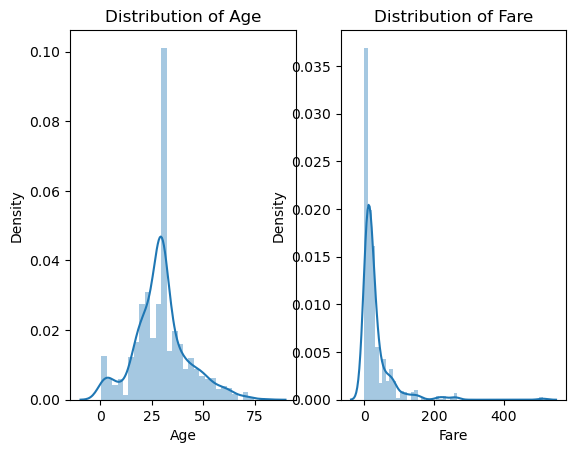

In [24]:
# Distribution of Age
plt.subplot(1, 2, 1)
sns.distplot(df['Age'])
plt.title('Distribution of Age')

# Distribution of Fare
plt.subplot(1, 2, 2)
sns.distplot(df['Fare'])
plt.title('Distribution of Fare')

plt.show()

In [25]:
# Finding the boundary values
print("Highest allowed",df['Age'].mean() + 3*df['Age'].std())
print("Lowest allowed",df['Age'].mean() - 3*df['Age'].std())

Highest allowed 68.70516332506747
Lowest allowed -9.306928030949834


In [26]:
len(df[(df['Age']>68)])

7

In [27]:
# TRIM
new_df = df[(df['Age'] < 68.7) & (df['Age'] > -9.30)]
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.000000,1,0,7.2500,S,2
1,1,1,female,38.000000,1,0,71.2833,C,2
2,1,3,female,26.000000,0,0,7.9250,S,1
3,1,1,female,35.000000,1,0,53.1000,S,2
4,0,3,male,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1
887,1,1,female,19.000000,0,0,30.0000,S,1
888,0,3,female,29.699118,1,2,23.4500,S,4
889,1,1,male,26.000000,0,0,30.0000,C,1


In [28]:
# Finding the IQR
percentile25 = new_df['Fare'].quantile(0.25)
percentile75 = new_df['Fare'].quantile(0.75)
iqr = percentile75 - percentile25

In [29]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [30]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 65.62344999999999
Lower limit -26.70575


In [31]:
len(df[df['Fare'] > upper_limit])

116

In [32]:
new_df['Fare'] = np.where(
    new_df['Fare'] > upper_limit,
    upper_limit,
    np.where(
        new_df['Fare'] < lower_limit,
        lower_limit,
        new_df['Fare']
    )
)

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_10776\4267084979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Fare'] = np.where(


Text(0.5, 1.0, 'Boxplot of Fare')

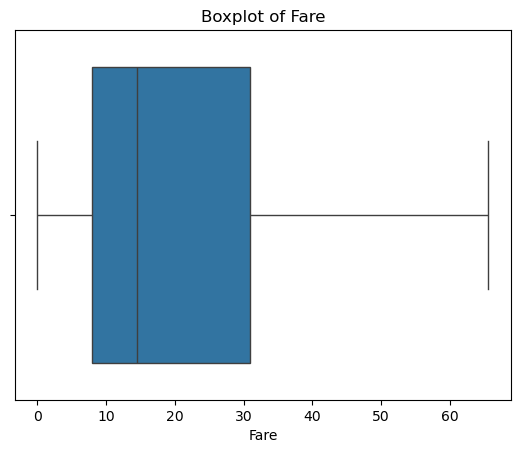

In [33]:
sns.boxplot(x=new_df['Fare'])
plt.title('Boxplot of Fare')

In [34]:
print(df['Sex'].unique())
print(df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [35]:
df1=new_df.copy()

In [36]:
# Assuming your dataframe is named 'df'
df1['Sex'] = df1['Sex'].str.strip().str.lower()
df1['Embarked'] = df1['Embarked'].str.strip().str.upper()

# 1. Encode 'Sex' using mapping
sex_map = {'male': 0, 'female': 1}
df1['Sex'] = df1['Sex'].map(sex_map)

# 2. Encode 'Embarked' using one-hot encoding
df1 = pd.get_dummies(df1, columns=['Embarked'], drop_first=False)


# Optional: Check results
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.25000,2,False,False,True
1,1,1,1,38.0,1,0,65.62345,2,True,False,False
2,1,3,1,26.0,0,0,7.92500,1,False,False,True
3,1,1,1,35.0,1,0,53.10000,2,False,False,True
4,0,3,0,35.0,0,0,8.05000,1,False,False,True


In [37]:
df1[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = df1[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1[['Age', 'Fare']] = scaler.fit_transform(df1[['Age', 'Fare']])

# Model

# Logistic

In [39]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Separate features and target
X = df1.drop('Survived', axis=1)
y = df1['Survived']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
log_model = LogisticRegression(max_iter=1000)

# Train the model
log_model.fit(X_train, y_train)

# Predict on test data
y_pred = log_model.predict(X_test)
y_proba = log_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.768361581920904
Confusion Matrix:
 [[86 19]
 [22 50]]
ROC AUC Score: 0.8312169312169312


# RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

# Fit model
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluate
print("Best Parameters:", grid_search.best_params_)
print("Tuned RF Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned RF Accuracy: 0.8305084745762712
Confusion Matrix:
 [[92 13]
 [17 55]]
ROC AUC Score: 0.862169312169312


# Prediction

In [42]:
import pandas as pd

# Example new passenger data (same format as training data)
data = {
    'Pclass': [3],
    'Sex': [1],              # 0 = male, 1 = female (must be encoded same as training)
    'Age': [0.35],           # normalized age
    'SibSp': [0],
    'Parch': [0],
    'Fare': [0.1],           # normalized fare
    'FamilySize': [1],
    'IsAlone': [1],
    'Embarked_C': [0],
    'Embarked_Q': [0],
    'Embarked_S': [1]
}

df_new = pd.DataFrame(data)

In [49]:
pred = best_rf.predict(df_new)
proba = best_rf.predict_proba(df_new)[:, 1]

print("Survived (0=No, 1=Yes):", pred[0])
print("Survival probability:", proba[0])

Survived (0=No, 1=Yes): 1
Survival probability: 0.8252222222222224
